In [ ]:
!pip install pytorch-tabnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 KB 2.1 MB/s eta 0:00:00


In [ ]:
import torch
from pytorch_tabnet.tab_model import TabNetRegressor
from pytorch_tabnet.pretraining import TabNetPretrainer
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
pip install japanize-matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 35.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=944ef9ebe0a346d283b441b601dfcb0c1fa2f0b64b1b2212605d84ff7315e004
  Stored in directory: /root/.cache/pip/wheels/91/8f/c2/83055ad0c9591b0a094730aa7cb2cc12fedacbcd2241baf534
Successfully built japanize-matplotlib


In [ ]:
import japanize_matplotlib

In [ ]:
df = pd.read_csv("mid.csv",encoding ='UTF-8')
df = df.drop(["種類", "都道府県名"], axis=1)
df = df.drop(["今後の利用目的", "取引の事情等"], axis=1)
df = df.dropna()

In [ ]:
def data_preprocess(df):
  cat_fetures = ["市区町村名", "地区名", "最寄駅：名称", "間取り", "建物の構造", "用途", "都市計画", "改装"]
  for col in cat_fetures:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(df[col])
    lbl.transform(df[col])
    df[col] = lbl.transform(df[col])
  return df

df =data_preprocess(df)

In [ ]:
X = df.drop(["取引価格（総額）"], axis=1).values
y = df["取引価格（総額）"].values.reshape(-1,1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=.3, random_state=0) 

In [ ]:
tabnet_params = dict(
    seed = 0, 
    optimizer_params = dict(lr = 1e-2), 
    n_steps=3,
    verbose = 10, 
)

model = TabNetRegressor(**tabnet_params)

model.fit(
    X_train, y_train,
    eval_set = [(X_valid, y_valid)],
    batch_size = 32,  
    max_epochs = 100, 
    patience = 100,  
)

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 408634520678432.9| val_0_mse: 407646365474914.0|  0:00:38s
epoch 10 | loss: 394629863639613.5| val_0_mse: 390631610476899.94|  0:04:37s
epoch 20 | loss: 349143553181483.2| val_0_mse: 352070564735553.2|  0:08:38s
epoch 30 | loss: 275533123272310.78| val_0_mse: 276012931483360.5|  0:12:39s
epoch 40 | loss: 187787243002265.56| val_0_mse: 195936841897977.62|  0:16:39s
epoch 50 | loss: 106000629746368.55| val_0_mse: 127062193485263.55|  0:20:37s
epoch 60 | loss: 48830526410194.92| val_0_mse: 36833422263390.32|  0:24:37s
epoch 70 | loss: 27847092432011.27| val_0_mse: 28339815557242.61|  0:28:37s
epoch 80 | loss: 24290924058640.39| val_0_mse: 54290813784323.9|  0:32:38s
epoch 90 | loss: 23870142254415.88| val_0_mse: 28954056190023.66|  0:36:42s
Stop training because you reached max_epochs = 100 with best_epoch = 99 and best_val_0_mse = 19861851425624.242


/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, preds)))
print("R2: ",r2_score(y_test, preds))

RMSE:  4549691.8667240115
R2:  0.772548473442036


In [ ]:
pretrainer = TabNetPretrainer(**tabnet_params)
pretrainer.fit(
    X_train,
    eval_set=[X_valid],
    max_epochs=5000,
    patience=100,
    )

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 14669.01153| val_0_unsup_loss_numpy: 14351.98828125|  0:00:02s
epoch 10 | loss: 3889.70766| val_0_unsup_loss_numpy: 15439.798828125|  0:00:27s
epoch 20 | loss: 6.60601 | val_0_unsup_loss_numpy: 12291.1982421875|  0:00:51s
epoch 30 | loss: 3.48947 | val_0_unsup_loss_numpy: 11272.36328125|  0:01:17s
epoch 40 | loss: 1.7353  | val_0_unsup_loss_numpy: 11310.69921875|  0:01:40s
epoch 50 | loss: 1.39659 | val_0_unsup_loss_numpy: 12056.05078125|  0:02:06s
epoch 60 | loss: 1.25498 | val_0_unsup_loss_numpy: 9966.9208984375|  0:02:29s
epoch 70 | loss: 1.2848  | val_0_unsup_loss_numpy: 5670.7333984375|  0:02:54s
epoch 80 | loss: 1.26923 | val_0_unsup_loss_numpy: 8697.0791015625|  0:03:21s
epoch 90 | loss: 1.23755 | val_0_unsup_loss_numpy: 11917.38671875|  0:03:44s
epoch 100| loss: 1.27277 | val_0_unsup_loss_numpy: 10785.3115234375|  0:04:09s
epoch 110| loss: 1.08464 | val_0_unsup_loss_numpy: 11902.8837890625|  0:04:33s
epoch 120| loss: 1.14951 | val_0_unsup_loss_numpy: 9997.29199

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
model = TabNetRegressor(**tabnet_params)

model.fit(
  X_train, y_train,
  eval_set=[(X_valid, y_valid)],
  max_epochs=5000,
  patience=100,
  eval_metric={'rmse'}, 
  from_unsupervised=pretrainer
)

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/abstract_model.py:231: UserWarning: Loading weights from unsupervised pretraining
  warnings.warn("Loading weights from unsupervised pretraining")


epoch 0  | loss: 408734839290318.44| val_0_rmse: 20195181.8624|  0:00:01s
epoch 10 | loss: 408600760109650.56| val_0_rmse: 20194490.37627|  0:00:24s
epoch 20 | loss: 408734845784724.6| val_0_rmse: 20192822.99886|  0:00:47s
epoch 30 | loss: 408554109707561.3| val_0_rmse: 20190186.75883|  0:01:08s
epoch 40 | loss: 408143559325630.0| val_0_rmse: 20187340.29777|  0:01:32s
epoch 50 | loss: 408192098517520.44| val_0_rmse: 20184421.43919|  0:01:53s
epoch 60 | loss: 407715794437681.56| val_0_rmse: 20180288.76341|  0:02:16s
epoch 70 | loss: 407916198824002.0| val_0_rmse: 20175293.37912|  0:02:38s
epoch 80 | loss: 407307223767238.2| val_0_rmse: 20167842.83443|  0:03:00s
epoch 90 | loss: 407449898294503.25| val_0_rmse: 20164396.09779|  0:03:22s
epoch 100| loss: 407042341833827.1| val_0_rmse: 20156762.16249|  0:03:45s
epoch 110| loss: 406496867998422.7| val_0_rmse: 20153934.45045|  0:04:08s
epoch 120| loss: 406721340654096.44| val_0_rmse: 20157251.97683|  0:04:29s
epoch 130| loss: 405968413836849.

/usr/local/lib/python3.9/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [ ]:
preds = model.predict(X_test)
print("RMSE: ",np.sqrt(mean_squared_error(y_test, preds)))
print("R2: ",r2_score(y_test, preds))

RMSE:  4111006.248914816
R2:  0.8142960417553144


In [ ]:
import matplotlib.pyplot as plt

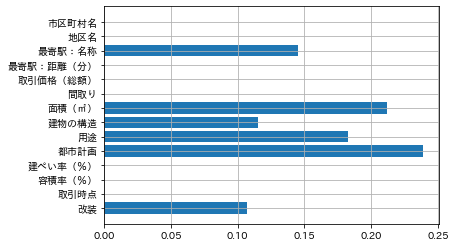

In [ ]:
plt.barh(list(df.columns[:-1])[::-1], model.feature_importances_[::-1])
plt.grid()
plt.show()